In [3]:
 #!pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import FinanceDataReader as fdr
import os
import pandas as pd
import numpy
import datetime

데이터 읽고 저장하는 함수, 다시 읽을땐 저장한 파일 읽어옴. Renewal이 True인 경우 이미 저장된 파일 무시하고 다시 다운로드
Stock Type으로 가능한 인자는 다음과 같음
'KRX', 'KOSPI', 'KOSDAQ', 'KONEX', 'NASDAQ', 'NYSE', 'AMEX', 'SP500'

In [5]:
def readStockData(stockType, renewal=False):
    """ 
    데이터 읽고 저장하는 함수, 다시 읽을땐 저장한 파일 읽어옴
    renewal이 True일 경우 이미 저장된 파일 무시하고 다시 다운로드
    stockType으로 가능한 인자는 다음과 같음
    'KRX', 'KOSPI', 'KOSDAQ', 'KONEX', 'NASDAQ', 'NYSE', 'AMEX', 'SP500'
    """
    if stockType not in ['KRX', 'KOSPI', 'KOSDAQ', 'KONEX', 'NASDAQ', 'NYSE', 'AMEX', 'SP500']:
        print("Error : invalid stock type %s" % stockType)
        exit(1)
    fileName = 'dataframe_%s.csv' % stockType
    if not os.path.exists(fileName) or renewal is True:
        df = fdr.StockListing(stockType)
        df.to_csv(fileName)
    else:
        df = pd.read_csv(fileName)
    index = {}
    for row in df.itertuples():
        symbol, name = row[list(df.columns).index("Symbol")+1], row[list(df.columns).index("Name")+1]
        index[name] = symbol
    return df, index

#사용 예시(KRX - 삼성전자)

In [6]:
df, index = readStockData('KRX')
df.head(10)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN
9,253160,KOSPI,ARIRANG 200선물인버스2X,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [7]:
df['Name'].head(10)

0                    3S
1                AJ네트웍스
2                 AK홀딩스
3                APS홀딩스
4                 AP시스템
5                  AP위성
6           ARIRANG 200
7       ARIRANG 200동일가중
8     ARIRANG 200선물레버리지
9    ARIRANG 200선물인버스2X
Name: Name, dtype: object

In [8]:
index["삼성전자"]

'005930'

주식의 이름과 년도를 받아 가격 데이터를 가져옴

lastYear가 주어지지 않을경우 현재까지로 지정

In [9]:
def getPriceByYear(index, name, startYear, lastYear=None):
    if lastYear is None:
        price = fdr.DataReader(str(index[name]), str(startYear))
    else:
        price = fdr.DataReader(str(index[name]), str(startYear), str(lastYear))
    return price

In [10]:
price = getPriceByYear(index, "삼성전자", 2018)
print("데이터 수 :", len(price))
price.head(10)

데이터 수 : 1134


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
2018-01-05,51300,52120,51200,52120,189623,0.020360
2018-01-08,52400,52520,51500,52020,167673,-0.001919
2018-01-09,51460,51720,49980,50400,360272,-0.031142
2018-01-10,50500,50520,48640,48840,371336,-0.030952
2018-01-11,48200,49260,48020,48240,502476,-0.012285
2018-01-12,48240,48480,46760,48200,545409,-0.000829


In [11]:
price = getPriceByYear(index, "삼성전자", 2018, 2020)
print("데이터 수 :", len(price))
price.head(10)

데이터 수 : 490


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
2018-01-05,51300,52120,51200,52120,189623,0.020360
2018-01-08,52400,52520,51500,52020,167673,-0.001919
2018-01-09,51460,51720,49980,50400,360272,-0.031142
2018-01-10,50500,50520,48640,48840,371336,-0.030952
2018-01-11,48200,49260,48020,48240,502476,-0.012285
2018-01-12,48240,48480,46760,48200,545409,-0.000829


    
  주식의 이름과 날짜(년도,월,일)를 받아 가격 데이터를 가져옴

마지막 날짜가 입력되지 않으면 무시되고 현재까지로 지정
  

In [12]:
def getPriceByDate(index, name, startYear, startMonth, startDay, lastYear=None, lastMonth=None, lastDay=None):

    startDateFormat = "%d-%02d-%02d" % (startYear, startMonth, startDay)
    #while(not numpy.is_busday(startDateFormat)):
     # d1 = datetime.datetime(startYear,startMonth,startDay) - datetime.timedelta(days=1)
      #startDateFormat = d1.isoformat()
    if lastYear is None or lastMonth is None or lastDay is None:
        price = fdr.DataReader(str(index[name]), startDateFormat)
    else:
        lastDateFormat = "%d-%02d-%02d" % (lastYear, lastMonth, lastDay)
        price = fdr.DataReader(str(index[name]), startDateFormat, lastDateFormat)
    return price

In [13]:
price = getPriceByDate(index, "삼성전자", 2019, 1, 1)
print("데이터 수 :", len(price))
price.head(10)

데이터 수 : 890


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292
2019-01-03,38300,38550,37450,37600,12471493,-0.029677
2019-01-04,37450,37600,36850,37450,14108958,-0.003989
2019-01-07,38000,38900,37800,38750,12748997,0.034713
2019-01-08,38000,39200,37950,38100,12756554,-0.016774
2019-01-09,38650,39600,38300,39600,17452708,0.039370
2019-01-10,40000,40150,39600,39800,14731699,0.005051
2019-01-11,40350,40550,39950,40500,11661063,0.017588
2019-01-14,40450,40700,39850,40050,11984996,-0.011111


In [14]:
# 2019년 1월 1일부터 2019년 1월 5일까지
price = getPriceByDate(index, "삼성전자", 2019, 1, 1, 2019, 1, 5)
print("데이터 수 :", len(price))
price.head(10)

데이터 수 : 3


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292
2019-01-03,38300,38550,37450,37600,12471493,-0.029677
2019-01-04,37450,37600,36850,37450,14108958,-0.003989


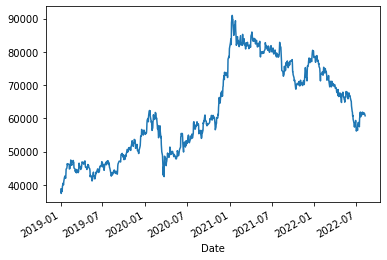

In [15]:
# 애플의 2019년 1월 1일부터 현재까지의 종가를 그래프로 나타내기
price = getPriceByDate(index, "삼성전자", 2019, 1, 1)
price['Close'].plot()

In [16]:
df, index = readStockData('KOSDAQ')
df.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
61,032790,KOSDAQ,BNGT,기계장비 및 관련 물품 도매업,"Bio 이종장기 사업, ICT 프린터 현상기",1997-06-26,12월,조상환,http://www.mgenplus.com,서울특별시


In [17]:
# 국내 주식도 똑같은 함수로 사용 가능
price = getPriceByDate(index, "3S", 2019, 1, 1, 2019, 1, 8)
print("데이터 수 :", len(price))
price.head(10)

데이터 수 : 5


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,2280,2280,2160,2190,24598,-0.011287
2019-01-03,2195,2195,2110,2180,44928,-0.004566
2019-01-04,2180,2395,2130,2240,180908,0.027523
2019-01-07,2260,2315,2225,2260,77610,0.008929
2019-01-08,2230,2265,2200,2250,39095,-0.004425


In [18]:
def getExchangeRateByYear(startYear, lastYear=None, From='USD', To='KRW'): 
    """
    startYear 년도부터 lastYear 년도까지의 환율 데이터를 가져옴 (기본값은 달러당 원화)
    USD : 달러
    KRW : 원
    EUR : 유로
    JPY : 엔
    CNY : 위엔
    lastYear가 주어지지 않을경우 현재까지로 지정
    """
    if lastYear is None:
        rate = fdr.DataReader('%s/%s' % (From, To), str(startYear))
    else:
        rate = fdr.DataReader('%s/%s' % (From, To), str(startYear), str(lastYear))
    return rate

def getExchangeRateByDate(startYear, startMonth, startDay, lastYear=None, lastMonth=None, lastDay=None, From='USD', To='KRW'):
    """
    날짜(년도,월,일)를 받아 환율 데이터를 가져옴 (기본값은 달러당 원화)
    마지막 날짜가 입력되지 않으면 무시되고 현재까지로 지정
    """
    startDateFormat = "%d-%02d-%02d" % (startYear, startMonth, startDay)
    if lastYear is None or lastMonth is None or lastDay is None:
        rate = fdr.DataReader('%s/%s' % (From, To), startDateFormat)
    else:
        lastDateFormat = "%d-%02d-%02d" % (lastYear, lastMonth, lastDay)
        rate = fdr.DataReader('%s/%s' % (From, To), startDateFormat, lastDateFormat)
    return rate

In [19]:
# 2015년부터 2017년까지의 달러당 원화 환율 데이터 
rate = getExchangeRateByYear(2015, 2017)
rate.head(10)

,Close,Open,High,Low,Change
Date,,,,,
2015-01-01,1092.45,1093.90,1094.28,1092.45,-0.0013
2015-01-02,1106.92,1092.73,1107.27,1092.03,0.0132
2015-01-05,1109.93,1106.90,1112.60,1105.16,0.0027
2015-01-06,1099.00,1109.93,1110.20,1096.75,-0.0098
2015-01-07,1098.74,1099.00,1103.95,1095.10,-0.0002
2015-01-08,1095.51,1098.74,1102.00,1094.89,-0.0029
2015-01-09,1085.82,1095.51,1097.10,1085.32,-0.0088
2015-01-12,1082.72,1085.11,1088.10,1080.90,-0.0029
2015-01-13,1078.78,1082.72,1086.60,1077.42,-0.0036


In [20]:
# 2015년 3월 2일부터 2017년 6월 4일까지의 달러당 원화 환율 데이터
rate = getExchangeRateByDate(2015, 3, 2, 2017, 6, 4) 
rate.head(10)

,Close,Open,High,Low,Change
Date,,,,,
2015-03-02,1103.05,1102.05,1106.70,1100.10,0.0016
2015-03-03,1096.83,1103.05,1105.10,1095.35,-0.0056
2015-03-04,1101.52,1096.83,1102.60,1094.87,0.0043
2015-03-05,1102.35,1101.52,1103.35,1099.63,0.0008
2015-03-06,1110.81,1101.95,1112.84,1097.33,0.0077
2015-03-09,1115.00,1111.41,1117.09,1108.40,0.0038
2015-03-10,1127.41,1115.05,1127.41,1115.00,0.0111
2015-03-11,1132.08,1127.50,1133.27,1123.90,0.0041
2015-03-12,1125.64,1132.08,1136.80,1119.25,-0.0057


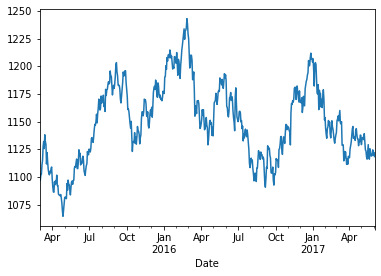

In [21]:
# 2015년 3월 2일부터 2017년 6월 4일까지의 달러당 원화 환율 종가 데이터를 그래프로 나타내기
rate = getExchangeRateByDate(2015, 3, 2, 2017, 6, 4)
rate['Close'].plot() 

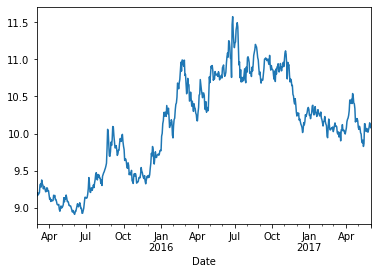

In [22]:
# 2015년 3월 2일부터 2017년 6월 4일까지의 엔화당 원화 환율 종가 데이터를 그래프로 나타내기
rate = getExchangeRateByDate(2015, 3, 2, 2017, 6, 4, From='JPY', To="KRW")
rate['Close'].plot()

In [23]:
def getClosePrice(index, name, year, month, day): 
  return getPriceByDate(index, name, year, month, day, year, month, day+2).iloc[0]["Close"]
# print(getClosePrice(index, "Apple Inc", 2018, 1, 3))

def getCloseRate(year, month, day, From='USD', To='KRW'): 
  return getExchangeRateByDate(year, month, day, year, month, day+2, From=From, To=To).iloc[0]["Close"]
# print(getCloseRate(2018, 1, 3))

In [24]:
print(getClosePrice(index,"3S", 2018, 1, 3))

1995.0


In [25]:
def resultprice(board, startprice, startrate, endprice, endrate, money):
  """
  시작-끝 날짜의 종가와 환율로 투자 결과 계산
  """
  if board == ('NASDAQ' or 'NYSE' or 'AMEX' or 'SP500'):
    result = money * (endprice/startprice) * (endrate/startrate)
  else:
    result = money * (endprice/startprice)
  return result

In [26]:
def simpleTradeApi():
  """
  시장, 회사명, 시작-끝 날짜, 초기자본 입력받아 투자 결과 출력
  """
  print('KRX', 'KOSPI', 'KOSDAQ', 'KONEX', 'NASDAQ', 'NYSE', 'AMEX', 'SP500')
  board = input("시장을 입력하세요: ").rstrip()
  df, index = readStockData(board)
  coperation = input("회사명을 입력하세요: ").rstrip()
  startYear, startMonth, startDay = map(int, input("백테스트 시작 날짜를 YEAR MONTH DAY 형식으로 입력하세요: ").split())
  startprice = getClosePrice(index, coperation, startYear, startMonth, startDay)
  startrate = getCloseRate(startYear, startMonth, startDay)
  endYear, endMonth, endDay = map(int, input("백테스트 끝 날짜를 YEAR MONTH DAY 형식으로 입력하세요: ").split())
  endprice = getClosePrice(index, coperation, endYear, endMonth, endDay)
  endrate = getCloseRate(endYear, endMonth, endDay)
  money = int(input("한화로 얼마를 넣으시겠습니까?: "))

  print("당신의 돈은", resultprice(board, startprice, startrate, endprice, endrate, money), "이 되었습니다")

In [27]:
simpleTradeApi()

KRX KOSPI KOSDAQ KONEX NASDAQ NYSE AMEX SP500
시장을 입력하세요: KOSPI
회사명을 입력하세요: 삼성전자
백테스트 시작 날짜를 YEAR MONTH DAY 형식으로 입력하세요: 2018 03 01
백테스트 끝 날짜를 YEAR MONTH DAY 형식으로 입력하세요: 2022 08 08
한화로 얼마를 넣으시겠습니까?: 1000000
당신의 돈은 1321164.7109952194 이 되었습니다


In [28]:
from datetime import datetime

def returnCurrnetWorkingDay():
  current_time = datetime.now()
  weekday = current_time.weekday()
  if weekday == 5:
    day = current_time.day-1
  elif weekday == 6:
    day = current_time.day-2
  elif current_time.hour < 16:
    day = current_time.day -1
  else:
    day = current_time.day
  return (current_time.year, current_time.month, day)

In [29]:
def getStockGrowth(index, name, years):
  year,month,day = returnCurrnetWorkingDay()
  #print(name)
  price = getPriceByYear(index, name, year-years)
  if(price.empty):
    return -1;
  startprice = price.iloc[0]['Close']
  
  endprice = price.iloc[len(price)-1]['Close']
  growth = (endprice - startprice) / startprice * 100

  return growth

In [30]:
getStockGrowth(index,"3S",3)

35.15981735159817

In [31]:
from operator import itemgetter
def getHigestGrowth(index, names, years):
  growthlist = []
  for name in names:
    #print(name)
    growth = getStockGrowth(index,name,years)
    if(growth == -1):
      continue
    growthlist.append((name,getStockGrowth(index,name,years)))
  if(len(growthlist) == 0):
    return -1,-1;
  highestName, highestGrowth =  max(growthlist,key=itemgetter(1))
  return highestName, highestGrowth

In [32]:
print(getHigestGrowth(index,df['Name'].head(10),1))

('CJ프레시웨이', 114.81481481481481)


해당 시장들 중 상승률이 가장 높은 종목을 합치는 함수
향후 KOSPI KOSDAQ 등 다른 시장도 포함 예정

In [33]:
def getHighestGrowthSectors(years):
  boards = ['KRX']
  sectorGrowth = {}
  for board in boards:
    df, index = readStockData(board)
    
    name, growth = getHigestGrowth(index,df['Name'].head(30),years)
    if(name == -1 and growth == -1):
      continue
    sectorGrowth[board] = [growth,name]
  return sectorGrowth

각 시장별 상승률이 가장 높은 종목을 반환
현재는 진나 1년을 기준으로 KRX에 존재하는 종목을 예시로 설정

In [34]:
sectorHighest = getHighestGrowthSectors(1)

표 츌력 예시

In [35]:
sectorHighest['정보'] = ['싱승률','이름']
sector = pd.DataFrame(sectorHighest)
sector.set_index("정보", inplace=True)
display(sector)

,KRX
정보,
싱승률,67.467249
이름,AJ네트웍스
